## Team Info

#### Team Name: Pablo

#### Team Members:
Kevin Xiong (kevxemail@vt.edu), Alexis Echeverria Martinez (alexis77@vt.edu), Stephen Angeley (sangeley@vt.edu), Nora Fareeha (norafareeha@vt.edu), Marcelina Krowinska (marcelina13k@vt.edu), 




## Updated Project Description:
Our group decided to analyze what traits made a song popular in 2019 vs 2023. This focus is motivated by the ongoing changes in cultural trends, especially in the age of very quickly evolving social media. Many social media platforms like TikTok and Instagram have made music a significant part of posting and interactions on social media, and many songs are now often discovered through these platforms rather than solely through music streaming platforms like Spotify. Due to the growth of these factors in recent years, we see a viable opportunity for research in analyzing the factors contributing to a song's popularity in 2019 vs 2023.

## Updated Research Questions:
The description above brings into question which specific factors contribute to a son’s popularity. Through this research we hope to answer the following questions:
- What traits are most correlated with the popularity of a song?
- What traits led to a song’s popularity in 2019 vs in 2023?
- Using the data sources listed below, we will be analyzing song popularity based on the following traits: liveness, energy, danceability, valence, acousticness, instrumentalness, speechiness, mode

## Updated Relevant Data:
Data sets used:
- https://www.kaggle.com/datasets/prasertk/spotify-global-2019-moststreamed-tracks
- https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

Team Contributions:
- Marcelina Krowinska – Project description, research question, and data updates
- Nora Fareeha – 2019 Data Visualization
- Kevin Xiong – 2023 Data Visualization
- Alexis Echeverria Martinez – 2019 Data Analysis
- Stephen Angeley – 2023 Data Analysis

## Data Visualization & Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2023 Visualization

In [20]:
spotify2023DF = pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1") # Changed encoding since UTF-8 didn't work due to special characters
spotify2023DF.head() # liveness, acousticness, energy, etc... Are all based on percentage ratings

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode_val,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [21]:
spotify2023DF = spotify2023DF.sort_values(by='streams', ascending=False) # Sort from most streams to least
spotify2023DF = spotify2023DF.iloc[:100, :] # Only take the 100 most popular songs
spotify2023DF.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode_val                object
danceability             int64
valence                  int64
energy                   int64
acousticness             int64
instrumentalness         int64
liveness                 int64
speechiness              int64
dtype: object

In [22]:
spotify2023DF.shape

(100, 24)

In [23]:
spotify2023DF['streams'] = pd.to_numeric(spotify2023DF['streams'])

#### Visualize the individual features and their frequencies

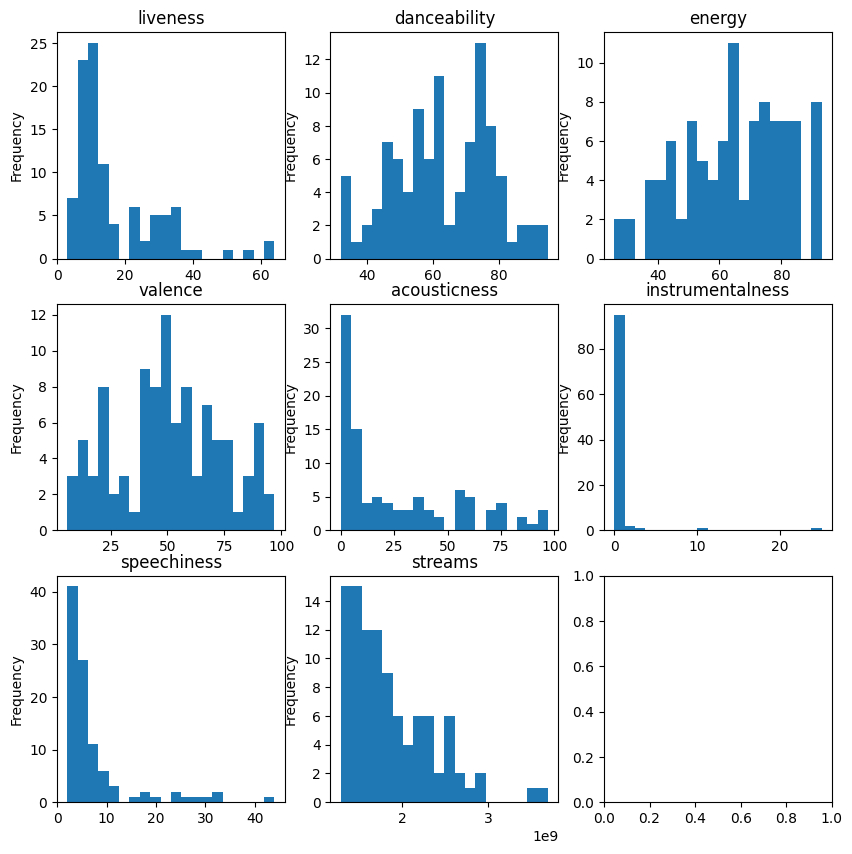

In [24]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axes = axes.flatten() # Flatten the axs array to iterate over it easily

# Columns we care about analyzing the distribution of
cols = ['liveness', 'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'speechiness', 'streams']
i = 0
for column in cols: # Generate a histogram for the frequency of each histogram and put it in the respective position for the subplot
    spotify2023DF[column].plot.hist(ax=axes[i], bins=20)
    axes[i].set_title(column)
    i += 1

# Adjust layout
plt.show()

#### Visualize the correlation of features

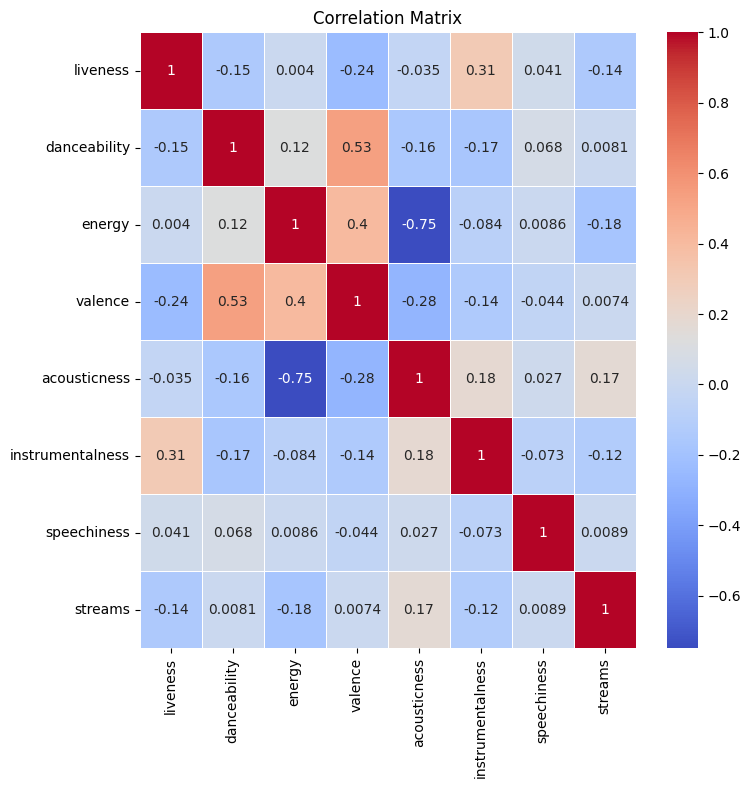

In [25]:
# Correlation matrix for each feature under consideration
df_filtered = spotify2023DF.loc[:, ['liveness', 'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'speechiness', 'streams']]
plt.figure(figsize=(8, 8))
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
artist_total_streams = pd.DataFrame(spotify2023DF.groupby('artist(s)_name')['streams'].sum()) # Group the artists and get the total number of streams

artist_total_streams.head()

,streams
artist(s)_name,
"24kgoldn, Iann Dior",1699402402
Adele,2878911167
Alec Benjamin,1374581173
Arctic Monkeys,3085352671
Avicii,3426754746


### 2023 Analysis

In our examination of song attributes within the dataset covering the year 2023, we emphasized eight primary characteristics: liveness, danceability, energy, valence, acousticness, instrumentalness, speechiness, and streams. Utilizing histograms and a correlation adjacency matrix, we explored the distribution of these attributes and their potential associations with song popularity.
   
Histogram Analysis:
   
Liveness:
   
   The distribution of liveness is heavily skewed to the upper end, specifically the 0 to 0.2 range. There is a somewhat consistent, but small amount of songs in the 0.2 to 0.4 range. There are also a few data points past 0.4, this suggests a couple of live performance songs that made it into the dataset.
   
Danceability:

   The distribution of danceability seems to have a positive correlation with frequency, suggesting that the more danceable a song is, the more plays it gets. Notably, there are peaks right next to drops along the entire chart, this is possibly because of how Spotify calculates the score with some rounding calculation. Also notable is that the far right of the chart is lower, suggesting that there may be a drop off for a song getting less plays if it is very danceable.
   
Energy:

   The distribution of energy scores is fairly uniform with a slight positive relationship and a notable peak at around the 0.6 range. This indicates that energy does not have a strong impact on the popularity of the song, which is interesting considering that danceabilty seemed to have a strong impact on popularity and intuitively, danceability and energy seem correlated.
   
Valence:

   The distrbution of valence scores is tricky to decipher, it appears to have a normal distribution with a peak frequency at 0.5 with 12 songs. Valence describes the "musical positiveness" of a song meaning a normal distribution implies there are an equal amount of musically positive and negative songs. This could be correlated to the fact that songs are either in the major or minor key, which tend to sound happy or sad respecitively. This may suggest that half the songs are major and the other half are minor.
   
Acousticness:

   The distribution of acousticness scores is very heavily skewed right because there are not many acoustic songs in the top 100. In fact, almost half the songs (45) have a acoustic score of 0 to 0.1, meaning most songs are produced with so much electronic music that there is no way it can be classified as acoustic.

Instrumentalness:

   95% of all songs have a 0 rating for instrumentalness because there are almost no solo singing tracks in the top 100. The biggest outlier has a score of 0.25, implying that there even songs with a high score in this characterstic have a low score hollistically. This shows that solo singing songs are not popular in the top 100.
   
Speechiness:

   The ditribution of speechiness skews right heavily and has a whopping peak of 40 at 0.5. This could imply that the top songs in 2023 are not vocally driven, have longer intros and outros, and/or voices are more autotuned so they do not get picked up by Spotify's calculation for speechiness.
   
Streams:

   The distribution of streams skews right with a fairly strong negative relationship. The distribution does not fall off quickly and there is one notable outlier to the far right, meaning that it was number one on the billboard and was well-liked by many listeners.
   
Correlation Matrix:

   From observing the correlation matrix, the most notable relationship is easily visible as the negative relationship between acousticness and energy. This makes sense since acoustic music tends to be softer, slower, have much less production, and overall result in a less energetic song. There is also a fairly strong correlation between valence and danceability, which similarly makes sense since those characteristics are intuitively related. It is interesting to note that, maybe because of their strong correlation to each other, valence and danceability have the lowest correlation with streams coming in with a score of 0.0074 and 0.0081 respectively. Speechiness also has an incrdibly low correlation with streams with a score of 0.0089, implying that songs do not need to be wordy, danceable, or happy to become popular. The characteristic with the most impact on streams is energy with a score of -0.18. This is fascinating because firstly, it is a negative correlation, meaning songs with lower energy get more streams. Secondly, energy has some of the lowest correlations on the entire matrix, specifically liveness, instrumentalness, and speechiness. This could be due to the low amount of high scores in those three characteristics, but even then, the relationships seem uncharacteristically low. A deeper examination into how these scores are calculated will have to be conducted to examine why this is the case. Overall, the correlation matrix does not give a clear indication that any characterstic have strong relationships to each other with a few exceptions stated above.
   
   


### 2019 Visualization


In [27]:
spotify2019DF = pd.read_csv("spotify-2019.csv", encoding="ISO-8859-1") # Changed encoding since UTF-8 didn't work due to special characters
spotify2019DF.head()

,Country,Rank,Track_id,Streams,Track Name,Artist,URL,acousticness,danceability,energy,...,valence,tempo,time_signature,duration_ms,key,mode,Artist_id,Artist_popularity,Artist_follower,Artist_img
0,global,1.0,25sgk305KZfyuqVBQIahim,1166185736,Sweet but Psycho,Ava Max,https://open.spotify.com/track/25sgk305KZfyuqV...,0.0691,0.719,0.704,...,0.628,133.002,4,187436,1,1,4npEfmQ6YuiwW1GpUmaq3F,87,1025358,https://i.scdn.co/image/4b914c6470c8458674538a...
1,global,2.0,2Fxmhks0bxGSBdJ92vM42m,1052358787,bad guy,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,0.3280,0.701,0.425,...,0.562,135.128,4,194088,7,1,6qqNVTkY8uBg9cP3Jd7DAH,98,18867904,https://i.scdn.co/image/2622edec99d68d1d141886...
2,global,3.0,6ocbgoVGwYJhOv1GgI9NsF,789094044,7 rings,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,0.5920,0.778,0.317,...,0.327,140.048,4,178627,1,0,66CXWjxzNUsdJxJ2JdwvnR,97,40958727,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
3,global,4.0,1rgnBhdG2JDFTbYkYRZAku,764208309,Dance Monkey,Tones and I,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,0.6880,0.825,0.593,...,0.540,98.078,4,209755,6,0,2NjfBq1NflQcKSeiDooVjY,92,484241,https://i.scdn.co/image/c128f5ef4d210a67610acd...
4,global,5.0,6v3KW9xbzN5yKLt9YKDYA2,763064359,SeÃ±orita,Shawn Mendes,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,0.0392,0.759,0.548,...,0.749,116.967,4,190800,9,0,7n2wHs1TKAczGzO7Dd2rGr,94,23152263,https://i.scdn.co/image/6bd59cfbd3e1e6394af710...


In [28]:
spotify2019DF = spotify2019DF.sort_values(by='Streams', ascending=False) # Sort from most streams to least
spotify2019DF = spotify2019DF.iloc[:100, :] # Only take the 100 most popular songs
spotify2019DF.dtypes

Country               object
Rank                 float64
Track_id              object
Streams                int64
Track Name            object
Artist                object
URL                   object
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
liveness             float64
loudness             float64
speechiness          float64
valence              float64
tempo                float64
time_signature         int64
duration_ms            int64
key                    int64
mode                   int64
Artist_id             object
Artist_popularity      int64
Artist_follower        int64
Artist_img            object
dtype: object

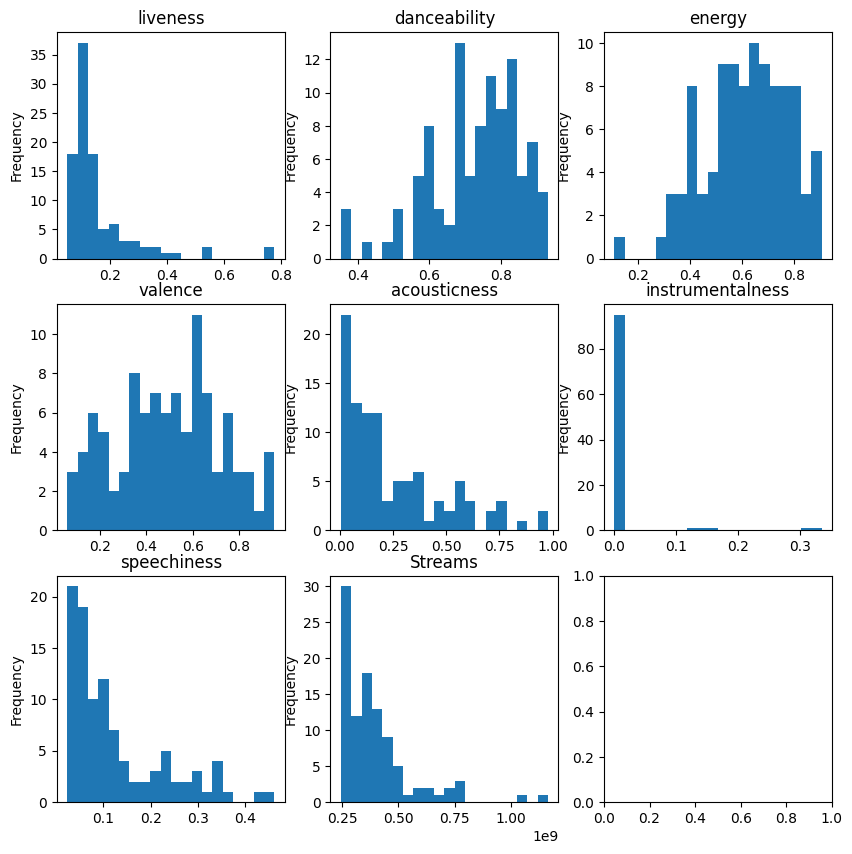

In [29]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axes = axes.flatten() # Flatten the axs array to iterate over it easily

# Columns we care about analyzing the distribution of
cols = ['liveness', 'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'speechiness', 'Streams']
i = 0
for column in cols: # Generate a histogram for the frequency of each histogram and put it in the respective position for the subplot
    spotify2019DF[column].plot.hist(ax=axes[i], bins=20)
    axes[i].set_title(column)
    i += 1

# Adjust layout
plt.show()

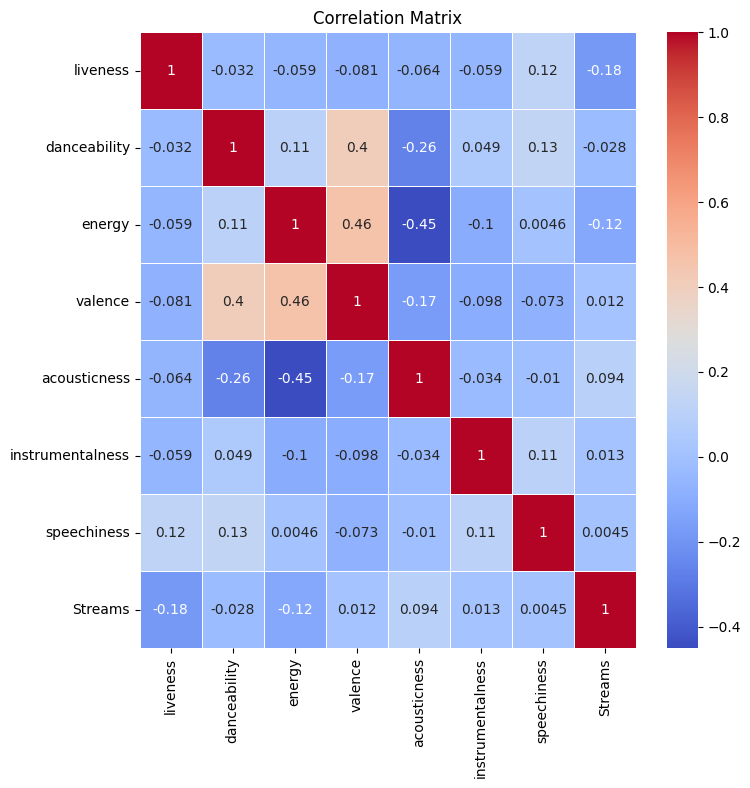

In [30]:
# Correlation matrix for each feature under consideration
df_filtered = spotify2019DF.loc[:, ['liveness', 'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'speechiness', 'Streams']]
plt.figure(figsize=(8, 8))
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 2019 Analysis

   In our analysis of the song attributes from the dataset spanning the years 2019, we focused on eight key characteristics which were liveness, danceability, energy, valence, acousticness, instrumentalness, speechiness, and streams. Through histograms and a correlation adjacency matrix we gained insights into the distrobution of these attributes and their potential correlation with song popularity.
   
Histogram Analysis:
   
Liveness:
   
   The distribution of liveness scores suggests that the majority of songs have low levels of liveness with a peak frequency observed at approximately 0.1 to 0.2. Outliers at higher liveness levels indicate the presence of live recordings or performances in our 2019 dataset.
   
Danceability:

   The distribution of danceability scores indicates that the majority of songs have high danceability with a peak frequency observed at around 0.7 topping off at 12 songs. The graph appears to skew left suggesting that songs which are popular tend to be more than above average on dancability in terms of the top 100 songs.
   
Energy:

   The distribution of energy scores shows a consistent frequency above 0.6 showing a majority of songs exhibit high energy so much so that songs that are at 0.4 and below only account for about 18% percent of our songs of intrest. This suggests that having a song with a high energy attribute is very standard if an it wishes to rank amongst the top 100.
   
Valence:
   The distrbution of valence scores appears to have an almost normal distribution, with a peak frequency obesreved at 0.6 with 10 songs. Suggesting that the dataset of top 100 songs have a ranging of emotional positivity.
   
Acousticness:

   The distribution of acousticness scores skews right meaning that the majority of the top songs do not have much acoustic rating in their track. 
So much so that the peak frequency is at about 20 for 0 acousticness.

Instrumentalness:

   About 98% of the songs had a rating of 0 on the instrmentalness attribute, with only 2 outliers being classifed above that mark. Suggesting almost every song had some kind of vocal element to it meaning that there is a strong corellation that songs which are purely instrumental have a more difficult time garnering popularity vs those with any kind of vocality.
   
Speechiness:

   The ditribution of speechiness skews right with a majority of songs having some lyrical aspects to them but not being to overpowering. This is likely to do with how spechiness is measured, since in order for a song to be at 1 speechiness it would have to pretty much be an audio book. So it is expected that songs tend to lie more around 0 to 0.2.
   
Streams:

   The distribution of streams (a measure of song popularity) skews right with about 85% being 0.5 and below. About 13% inbetween 0.5 and 0.75. Leaving to 2 major outliers at the far end meaning that those  2 songs must have been in the number 1 spot for a very longtime and likely appealed to a majority of music listeners.
   
Correlation Matrix:

   Obesrving the correlation matrix provides insights into some relationships that show interaction with one another. The main ones being between dancability, energy, valance, and acousticness. First observing the intersection between valance and dancibility there is a solid correlation of 0.4 which makes sense with respect to the fact that the majority of songs which people would tend to want to dance to are ones that illict a positive emotions. Looking at valence and energy they have a value of 0.46, these go hand in hand as songs with strong energy tend to focus on postive exciting emotions. Next focus is acousticness and energy which have an inverse correlation of -0.45, since acoustic tracks tend to focus on being more grounded in comparison to nonacoustic tracks, they try to avoid being too energetic, generally focusing on a more contemplative experience for the listener. As such acousticness and dancibility are inverse as well with a correlation value of -0.26 since dancability and energy show a strong correlation with one another, it make sense that since acousticness lacks in the energy attribute typically, dancability will be much lower as well.

   Overall the correlation matrix shows that songs which are typically more energtic, have great dancibility, and valance, will typically lead to the song being more popular as seen by the vast quanitiy of songs on the top 100 having a solid foundation in these attributes for song in 2019.

### 2019 vs 2023 Analysis

The overall correlation for the entire matrix in 2023 is a much lighter shade than the 2019 visualization, suggesting that the top 100 songs in 2023 was more diverse characteristically. Many of the trends stayed consistent between the years and the overall shading of the matrix is similar, but the strength of the correlations across the entire board dwindled. This could be due to an unlistable amount of reasons, but the most significant cause could simply be that there are more artists and songs in 2023 compared to 2019, and the top 100 has shifted around to include more diverse music accordingly. This also applies to the amount of users on the platform; as the amount of Spotify users grow, the diversity of music expands, and different artists and songs get to the top 100.

## Clustering with DBSCAN

### 2023

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
qualitative = [i for i in spotify2023DF.columns if spotify2023DF[i].dtypes == "object"]

print(qualitative)

['track_name', 'artist(s)_name', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode_val']


In [33]:
cluster2023DF = spotify2023DF.drop(columns=qualitative) # Drop the qualitative columns for clustering

In [34]:
nan_map = cluster2023DF.isna().sum() # Check for NaN values
nan_map

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_charts        0
bpm                     0
danceability            0
valence                 0
energy                  0
acousticness            0
instrumentalness        0
liveness                0
speechiness             0
dtype: int64

In [40]:
cluster2023DF.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
55,1,2019,11,29,43899,69,3703895074,672,199,20,171,50,38,80,0,0,9,7
179,1,2017,1,6,32181,10,3562543890,33,0,7,96,83,93,65,58,0,9,8
86,1,2018,11,8,17836,53,2887241814,440,125,0,110,50,45,41,75,0,11,3
619,1,2019,5,10,24529,0,2864791672,533,167,6,98,82,54,59,69,0,18,10
41,2,2018,10,9,24094,78,2808096550,372,117,4,90,76,91,50,54,0,7,5


In [48]:
cluster2023DF.shape

(100, 18)

In [41]:
clustering2023 = DBSCAN().fit(cluster2023DF)

In [42]:
clustering2023.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

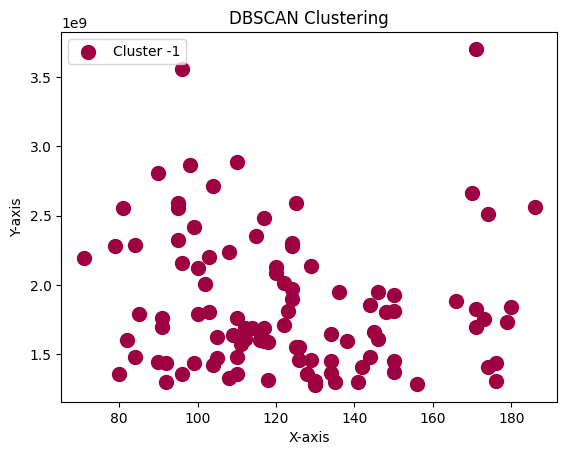

In [49]:
# Extract cluster labels
cluster_labels = clustering2023.labels_

# Get unique labels
unique_labels = set(cluster_labels)

# Create colors for each unique label
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster with a unique color
for k, col in zip(unique_labels, colors):
    class_member_mask = (cluster_labels == k)

    # Plot core samples
    xy = cluster2023DF[class_member_mask]
    plt.scatter(xy['bpm'], xy['streams'], s=100, c=[col], label=f'Cluster {k}')

# Plot additional styling
plt.title("DBSCAN Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

## 2019

In [36]:
qualitative = [i for i in spotify2019DF.columns if spotify2019DF[i].dtypes == "object"]

print(qualitative)

['Country', 'Track_id', 'Track Name', 'Artist', 'URL', 'Artist_id', 'Artist_img']


In [37]:
cluster2019DF = spotify2019DF.drop(columns=qualitative)

In [38]:
nan_map = cluster2019DF.isna().sum() # Check for NaN values
nan_map

Rank                 0
Streams              0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
valence              0
tempo                0
time_signature       0
duration_ms          0
key                  0
mode                 0
Artist_popularity    0
Artist_follower      0
dtype: int64

In [39]:
cluster2019DF.head()

,Rank,Streams,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,duration_ms,key,mode,Artist_popularity,Artist_follower
0,1.0,1166185736,0.0691,0.719,0.704,0.000000,0.1660,-4.724,0.0476,0.628,133.002,4,187436,1,1,87,1025358
1,2.0,1052358787,0.3280,0.701,0.425,0.130000,0.1000,-10.965,0.3750,0.562,135.128,4,194088,7,1,98,18867904
2,3.0,789094044,0.5920,0.778,0.317,0.000000,0.0881,-10.732,0.3340,0.327,140.048,4,178627,1,0,97,40958727
3,4.0,764208309,0.6880,0.825,0.593,0.000161,0.1700,-6.401,0.0988,0.540,98.078,4,209755,6,0,92,484241
4,5.0,763064359,0.0392,0.759,0.548,0.000000,0.0828,-6.049,0.0290,0.749,116.967,4,190800,9,0,94,23152263
